In [17]:
import csv
import json
import os
import sys
import glog
import numpy as np
import tensorflow as tf
import pandas as pd
import datetime   
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [20]:
import torch

In [21]:
torch.cuda.is_available()

True

In [17]:
# os.environ

In [ ]:
from sentence_transformers import SentenceTransformer

sbert_model = 'roberta-large-nli-stsb-mean-tokens' #'distilbert-base-nli-mean-tokens'


model = SentenceTransformer(sbert_model)

I1002 21:34:11.958472 140549109524288 SentenceTransformer.py:39] Load pretrained SentenceTransformer: roberta-large-nli-stsb-mean-tokens
I1002 21:34:11.958970 140549109524288 SentenceTransformer.py:43] Did not find folder roberta-large-nli-stsb-mean-tokens. Assume to download model from server.
I1002 21:34:11.959699 140549109524288 SentenceTransformer.py:93] Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_roberta-large-nli-stsb-mean-tokens


In [5]:
model.encode(['hi'])

array([[-0.34287128, -0.68932533, -0.49196592, ...,  0.06708434,
        -0.8115227 ,  0.23892204]], dtype=float32)

In [64]:
from laserembeddings import Laser

laser = Laser()

# if all sentences are in the same language:

embeddings = laser.embed_sentences(
    ['let your neural network be polyglot',
     'use multilingual embeddings!'])
# ,
#     lang='en')  # lang is only used for tokenization


TypeError: embed_sentences() missing 1 required positional argument: 'lang'

In [63]:
embeddings.shape

(2, 1024)

In [47]:
os.listdir('../../workspace')

['polyai-models']

In [43]:
os.getcwd()

'/polyai-models/intent_detection'

In [57]:
os.listdir('/wo')

['sbin',
 'dev',
 'run',
 'proc',
 'mnt',
 'home',
 'boot',
 'opt',
 'lib',
 'root',
 'usr',
 'tmp',
 'var',
 'bin',
 'srv',
 'sys',
 'etc',
 'media',
 'lib64',
 'workspace',
 'polyai-models',
 '.dockerenv']

In [18]:
# train = pd.read_csv('/workspace/polyai-models/alliance_split_human/200908_alliance_train_60_human_paraphrase.csv')

In [19]:
tf.test.is_gpu_available()

False

In [9]:
os.getcwd()

'/polyai-models/intent_detection'

In [2]:
test = pd.read_csv('/polyai-models/polyai-models/200909_test_huawei_wallet_30strat_min3_manyanswers.csv')
train = pd.read_csv('/polyai-models/polyai-models/200909_train_huawei_wallet_60strat_min3_manyanswers.csv')
val = pd.read_csv('/polyai-models/polyai-models/200909_val_huawei_wallet_10strat_min3_manyanswers.csv')

In [3]:
train.shape

(4676, 7)

In [4]:
train = train.append(val)

In [5]:
train.reset_index(drop=True, inplace=True)

In [6]:
train.head()

,Unnamed: 0,Unnamed: 0.1,text,intent,intentId,labels,answer
0,0,217,The simulated blank card is not used.,How Do I Use a Simulated Blank Card?,00156473141983100212286ed4895296,326,The following uses the wallet 9.0.6.300 as an ...
1,1,3368,"Hello, how can I use Huawei pay to brush the s...",Handling Method of Failure to Brush Public Tra...,00154140377758816723286ed488ffbf,125,If your phone fails to swipe your bank card at...
2,2,4116,A few cents are deducted after a bank card is ...,Method of deducting a few cents after a bank c...,00154140377750316546286ed488ffbf,92,"When a quick payment bank card is bound, the H..."
3,3,5516,The traffic card does not respond to card swip...,"When you take a subway or a bus, you fail to u...",00154140377742916362286ed488ffbf,59,",status"":""3003""}"
4,4,766,The recharge service of the traffic card in He...,What can I do if the recharge service of the t...,00156168896609901153286ed4895296,272,Method 1: Wait patiently for the recharge serv...


In [29]:
def rf_tidft(train, test):
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.metrics import accuracy_score
    from sklearn.feature_extraction.text import TfidfVectorizer
    model = RandomForestClassifier()
    trans = TfidfVectorizer()
    train_text = trans.fit_transform(train.text)
    test_text = trans.transform(test.text)
    model.fit(train_text, train.labels)
    pred = model.predict(test_text)
    acc = accuracy_score(test.labels, pred)
    return acc

In [30]:
rf_tidft(train,test)

0.8695652173913043

In [32]:
train['labels']=train.labels.astype(int)

0    1
1    0
2    2
Name: labels, dtype: int64

In [31]:
train.labels.dtype

dtype('int64')

In [163]:
#https://pypi.org/project/embeddings/
# !pip install embeddings

In [28]:
with tf.gfile.Open(test, "r") as data_file:
    data = np.array(list(csv.reader(data_file))[1:])
    print(data.shape)
    

(2331, 7)


In [8]:
!pip install git+https://github.com/vzhong/embeddings.git

  Cloning https://github.com/vzhong/embeddings.git to /tmp/pip-req-build-rzhw68mg
  Created wheel for embeddings: filename=embeddings-0.0.8-py3-none-any.whl size=13471 sha256=f72bc462df2f5c6cc0bd611a039a3db3c637b761c8a6dc3ea4b729225871cae6
  Stored in directory: /tmp/pip-ephem-wheel-cache-up_9ulsr/wheels/62/a6/c7/11436be984533e17449a1cf42d6cfd455b085181941f49b496
Successfully built embeddings


In [59]:
from embeddings import GloveEmbedding, FastTextEmbedding, KazumaCharEmbedding, ConcatEmbedding

g = GloveEmbedding('common_crawl_840', d_emb=300, show_progress=True)
# f = FastTextEmbedding(lang='en', )
# k = KazumaCharEmbedding()
# c = ConcatEmbedding([g, f, k])

In [71]:
# g.emb('canada')

In [52]:
train.text

0                   The simulated blank card is not used.
1       Hello, how can I use Huawei pay to brush the s...
2       A few cents are deducted after a bank card is ...
3       The traffic card does not respond to card swip...
4       The recharge service of the traffic card in He...
                              ...                        
5433    Can a bank card and a fast branch be unbound f...
5434    Which models can be used to access the access ...
5435                              Why not add a bus card?
5436                The simulated blank card is not used.
5437    How to disable automatic renewal of Huawei vid...
Name: text, Length: 5438, dtype: object

In [53]:
train.text[0]

'The simulated blank card is not used.'

In [54]:
glove_emb = [g.emb(i) for i in train.text]

In [55]:
glove_emb_test = [g.emb(i) for i in test.text]

In [56]:
model = RandomForestClassifier()

In [72]:
# glove_emb[0]

In [36]:
model.fit(glove_emb, train.labels)

ValueError: Input contains NaN, infinity or a value too large for dtype('float32').

In [36]:
labels= data[:,5]
text = data[:,2]

In [ ]:
    if hparams.data_regime == "full":
        train_file = "train"
    elif hparams.data_regime == "10":
        train_file = "train_10"
    elif hparams.data_regime == "30":
        train_file = "train_30"
    else:
        glog.error(f"Invalid data regime: {hparams.data_regime}")
    train_data = os.path.join(
        data_dir, hparams.task, f"{train_file}.csv")
    test_data = os.path.join(data_dir, hparams.task, "test.csv")
    categories_file = os.path.join(data_dir, hparams.task, "categories.json")

    with tf.gfile.Open(categories_file, "r") as categories_file:
        categories = json.load(categories_file)
    
    
    labels = {}
    encodings = {}

    with tf.gfile.Open(train_data, "r") as data_file:
        data = np.array(list(csv.reader(data_file))[1:])
        labels[_TRAIN] = data[:, 1]
        encodings[_TRAIN] = encoder_client.encode_sentences(data[:, 0])

    with tf.gfile.Open(test_data, "r") as data_file:
        data = np.array(list(csv.reader(data_file))[1:])
        labels[_TEST] = data[:, 1]
        encodings[_TEST] = encoder_client.encode_sentences(data[:, 0])

    # convert labels to integers
    labels = {
        k: np.array(
            [categories.index(x) for x in v]) for k, v in labels.items()
    }

In [6]:
_TRAIN = "train"
_TEST = "test"


def _preprocess_data(encoder_client, hparams, data_dir):
    """Reads the data from the files, encodes it and parses the labels

    Args:
        encoder_client: an EncoderClient
        hparams: a tf.contrib.training.HParams object containing the model
            and training hyperparameters
        data_dir: The directory where the inten data has been downloaded

    Returns:
        categories, encodings, labels

    """
    if hparams.data_regime == "full":
        train_file = "train"
    elif hparams.data_regime == "10":
        train_file = "train_10"
    elif hparams.data_regime == "30":
        train_file = "train_30"
    else:
        glog.error(f"Invalid data regime: {hparams.data_regime}")
    train_data = os.path.join(
        data_dir, hparams.task, f"{train_file}.csv")
    test_data = os.path.join(data_dir, hparams.task, "test.csv")
    categories_file = os.path.join(data_dir, hparams.task, "categories.json")

    with tf.gfile.Open(categories_file, "r") as categories_file:
        categories = json.load(categories_file)

    labels = {}
    encodings = {}

    with tf.gfile.Open(train_data, "r") as data_file:
        data = np.array(list(csv.reader(data_file))[1:])
        labels[_TRAIN] = data[:, 1]
        encodings[_TRAIN] = encoder_client.encode_sentences(data[:, 0])

    with tf.gfile.Open(test_data, "r") as data_file:
        data = np.array(list(csv.reader(data_file))[1:])
        labels[_TEST] = data[:, 1]
        encodings[_TEST] = encoder_client.encode_sentences(data[:, 0])

    # convert labels to integers
    labels = {
        k: np.array(
            [categories.index(x) for x in v]) for k, v in labels.items()
    }

    return categories, encodings, labels


In [2]:
def _main():
    parsed_args, hparams = parse_args_and_hparams()

    if hparams.task.lower() not in ["clinc", "hwu", "banking"]:
        raise ValueError(f"{hparams.task} is not a valid task")

    encoder_client = get_encoder_client(hparams.encoder_type,
                                        cache_dir=hparams.cache_dir)

    categories, encodings, labels = _preprocess_data(
        encoder_client, hparams, parsed_args.data_dir)

    accs = []
    eval_acc_histories = []
    if hparams.eval_each_epoch:
        validation_data = (encodings[_TEST], labels[_TEST])
        verbose = 1
    else:
        validation_data = None
        verbose = 0

    for seed in range(hparams.seeds):
        glog.info(f"### Seed {seed} ###")
        model, eval_acc_history = train_model(
            encodings[_TRAIN], labels[_TRAIN], categories, hparams,
            validation_data=validation_data, verbose=verbose)

        _, acc = model.evaluate(encodings[_TEST], labels[_TEST], verbose=0)
        glog.info(f"Seed accuracy: {acc:.3f}")
        accs.append(acc)
        eval_acc_histories.append(eval_acc_history)

    average_acc = np.mean(accs)
    variance = np.std(accs)
    glog.info(
        f"Average results:\n"
        f"Accuracy: {average_acc:.3f}\n"
        f"Variance: {variance:.3f}")

    results = {
        "Average results": {
            "Accuracy": float(average_acc),
            "Variance": float(variance)
        }
    }
    if hparams.eval_each_epoch:
        results["Results per epoch"] = [
            [float(x) for x in y] for y in eval_acc_histories]

    if not tf.gfile.Exists(parsed_args.output_dir):
        tf.gfile.MakeDirs(parsed_args.output_dir)
    with tf.gfile.Open(
            os.path.join(parsed_args.output_dir, "results.json"), "w") as f:
        json.dump(results, f, indent=2)

In [3]:
def train_model(train_encodings, train_labels, categories, hparams,
                validation_data=None, verbose=1):
    """Trains an intent classification model

    Args:
        train_encodings: np.array with the train encodings
        train_labels: list of labels corresponding to each train example
        categories: the set of categories
        hparams: a tf.contrib.training.HParams object containing the model
            and training hyperparameters
        validation_data: (validation_encodings, validation_labels) tuple
        verbose: the keras_model.train() verbose level

    Returns:
        model: a keras model
        eval_acc_history: The evaluation results per epoch

    """
    distribution = None if not hparams.balance_data else {
        x: 1. / len(categories) for x in range(len(categories))}

    batcher = SamplingBatcher(
        train_encodings, train_labels, hparams.batch_size, distribution)

    steps_per_epoch = np.ceil(len(train_labels) / hparams.batch_size)

    model, eval_acc_history = _train_mlp_with_generator(
        batcher, train_encodings.shape[1], steps_per_epoch,
        categories, hparams, validation_data=validation_data, verbose=verbose)
    return model, eval_acc_history


In [4]:
from collections import abc
from typing import Dict, Optional

import numpy as np

_MAX_PER_BATCH = 3


class SamplingBatcher(abc.Iterator):
    """Batcher that samples according to a given distribution.

    It defaults to sampling from the data distribution.

    WARNING: this class is not deterministic. if you want deterministic
    behaviour, just freeze the numpy seed.
    """
    def __init__(
            self,
            examples: np.ndarray,
            labels: np.ndarray,
            batch_size: int,
            sample_distribution: Optional[Dict[int, float]] = None,
    ):
        """Create a new BalancedBatcher.

        Args:
            examples: np.ndarray containing examples
            labels: np.ndarray containing labels
            batch_size: int size of a single batch
            sample_distribution: optional distribution over label
                classes for sampling. This is normalized to sum to 1. Defines
                the target distribution that batches will be sampled with.
                Defaults to the data distribution.
        """
        _validate_labels_examples(examples, labels)
        self._examples = examples
        self._labels = labels
        self._label_classes = np.unique(labels)
        self._class_to_indices = {
            label: np.argwhere(labels == label).flatten()
            for label in self._label_classes
        }
        if sample_distribution is None:
            # Default to the data distribution
            sample_distribution = {
                label: float(indices.size)
                for label, indices in self._class_to_indices.items()
            }
        self._label_choices, self._label_probs = (
            self._get_label_choices_and_probs(sample_distribution))
        self._batch_size = batch_size

    def _get_label_choices_and_probs(self, sample_distribution):
        label_choices = []
        label_probs = []
        weight_sum = sum(sample_distribution.values())
        for label, weight in sample_distribution.items():
            if label not in self._labels:
                raise ValueError(
                    f"label {label} in sample distribution does not exist")
            if weight < 0.0:
                raise ValueError(
                    f"weight {weight} for label {label} is negative")
            label_choices.append(label)
            label_probs.append(weight / weight_sum)

        return np.array(label_choices), np.array(label_probs)

    def __next__(self):
        """Generates the next batch.

        Returns:
            (batch_of_examples, batch_of_labels) - a tuple of ndarrays
        """
        class_choices = np.random.choice(
            self._label_choices, size=self._batch_size, p=self._label_probs)

        batch_indices = []
        for class_choice in class_choices:
            indices = self._class_to_indices[class_choice]
            batch_indices.append(np.random.choice(indices))

        return self._examples[batch_indices], self._labels[batch_indices]

    def __iter__(self):
        """Gets an iterator for this iterable

        Returns:
            self because the class is an iterator itself
        """
        return self

In [6]:
ds = [i for i in os.listdir('../') if '.csv' in i]

I1001 16:58:31.080761 140033732114240 font_manager.py:1423] Generating new fontManager, this may take some time...


In [25]:
# !pip install seaborn

In [55]:
algos = ['sbert_cosine','rf_tfidf','sbert','use','convert','combined','laser_convert_use']
datasets = [ "wallet", "alliance", "bank_split"]

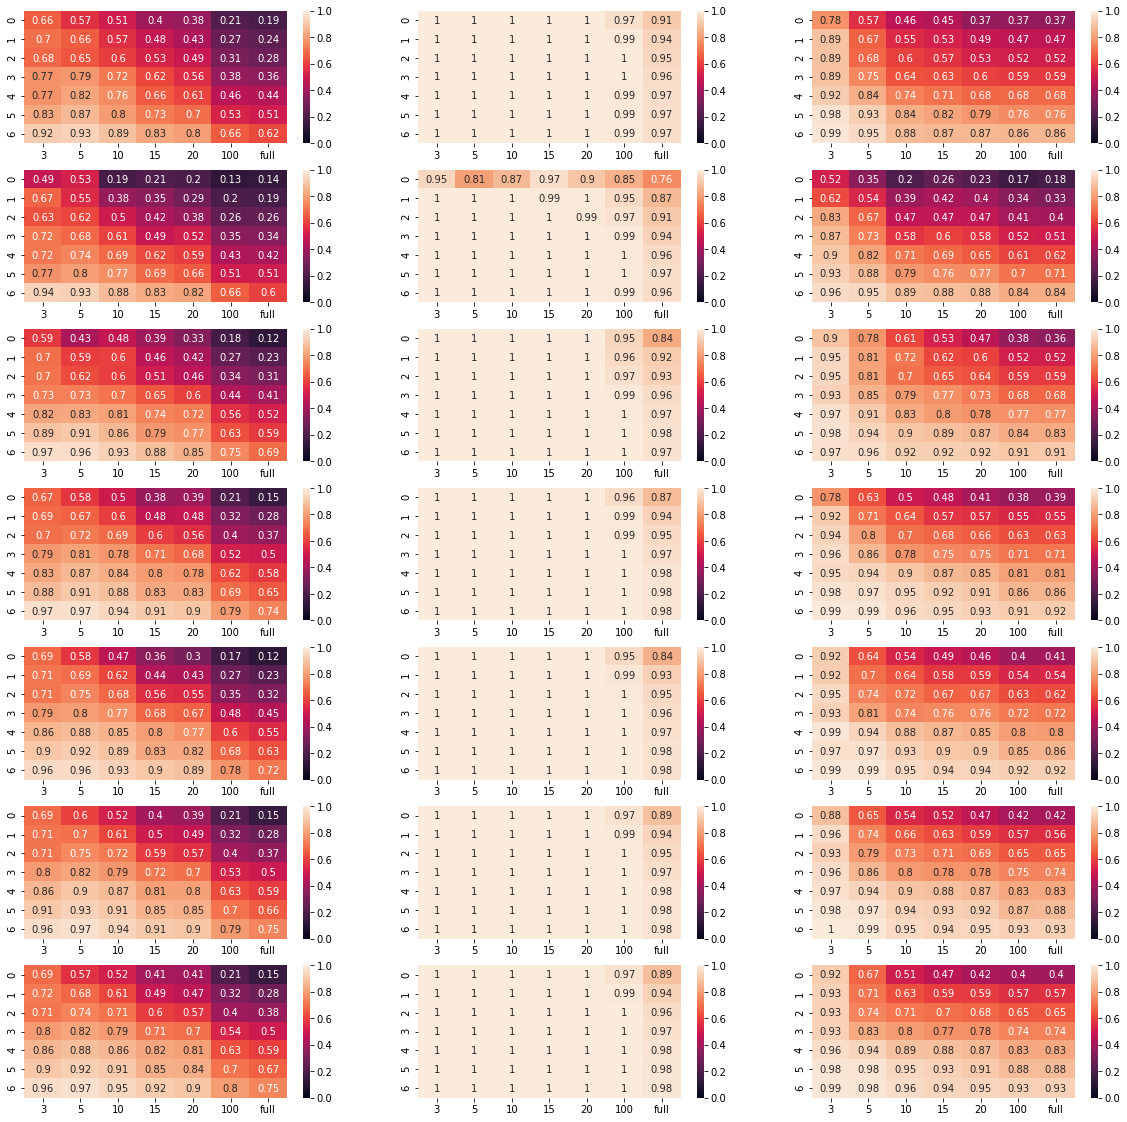

In [45]:
darray=[]
fig, ax = plt.subplots(nrows = len(algos), ncols = len(datasets), figsize=(20,20))
for ca, algo in enumerate(algos):
    for cd, over_ride_dataset in enumerate(datasets):
        r = pd.read_csv(f'../200930_{algo}_{over_ride_dataset}.csv')
#         st=os.stat(f'../200930_{algo}_{over_ride_dataset}.csv') 
#         mtime=st.st_mtime
#         print(mtime)
#         print("mdatetime = {}".format(datetime.datetime.fromtimestamp(mtime)))
        try:
#             display(r)
            data = r[['3','5','10','15','20','100','full']]
            ax[ca, cd]=sns.heatmap(data, annot=True,vmin=0, vmax=1, ax = ax[ca, cd] )#, xlabel='nclasses')
#             ax[ca, cd].set_title(f'{algo}_{over_ride_dataset}')
            darray.append(data.values)
        except Exception as e:
            pass

In [46]:
darray = np.array(darray)
darray.shape

(21, 7, 7)

0
1601675842.4169645
mdatetime = 2020-10-02 21:57:22.416965
1601676011.369524
mdatetime = 2020-10-02 22:00:11.369524
1601676189.9381099
mdatetime = 2020-10-02 22:03:09.938110
1
1601676746.2599154
mdatetime = 2020-10-02 22:12:26.259915
1601676794.808072
mdatetime = 2020-10-02 22:13:14.808072
1601676813.8441334
mdatetime = 2020-10-02 22:13:33.844133
2
1601562938.8612652
mdatetime = 2020-10-01 14:35:38.861265
1601563864.3285396
mdatetime = 2020-10-01 14:51:04.328540
1601565057.4149468
mdatetime = 2020-10-01 15:10:57.414947
3
1601566957.107618
mdatetime = 2020-10-01 15:42:37.107618
1601569039.8871195
mdatetime = 2020-10-01 16:17:19.887120
1601571237.8819425
mdatetime = 2020-10-01 16:53:57.881943
4
1601573403.3790696
mdatetime = 2020-10-01 17:30:03.379070
1601575782.123233
mdatetime = 2020-10-01 18:09:42.123233
1601578407.3514276
mdatetime = 2020-10-01 18:53:27.351428
5
1601582097.2831285
mdatetime = 2020-10-01 19:54:57.283128
1601585960.0921402
mdatetime = 2020-10-01 20:59:20.092140
160159

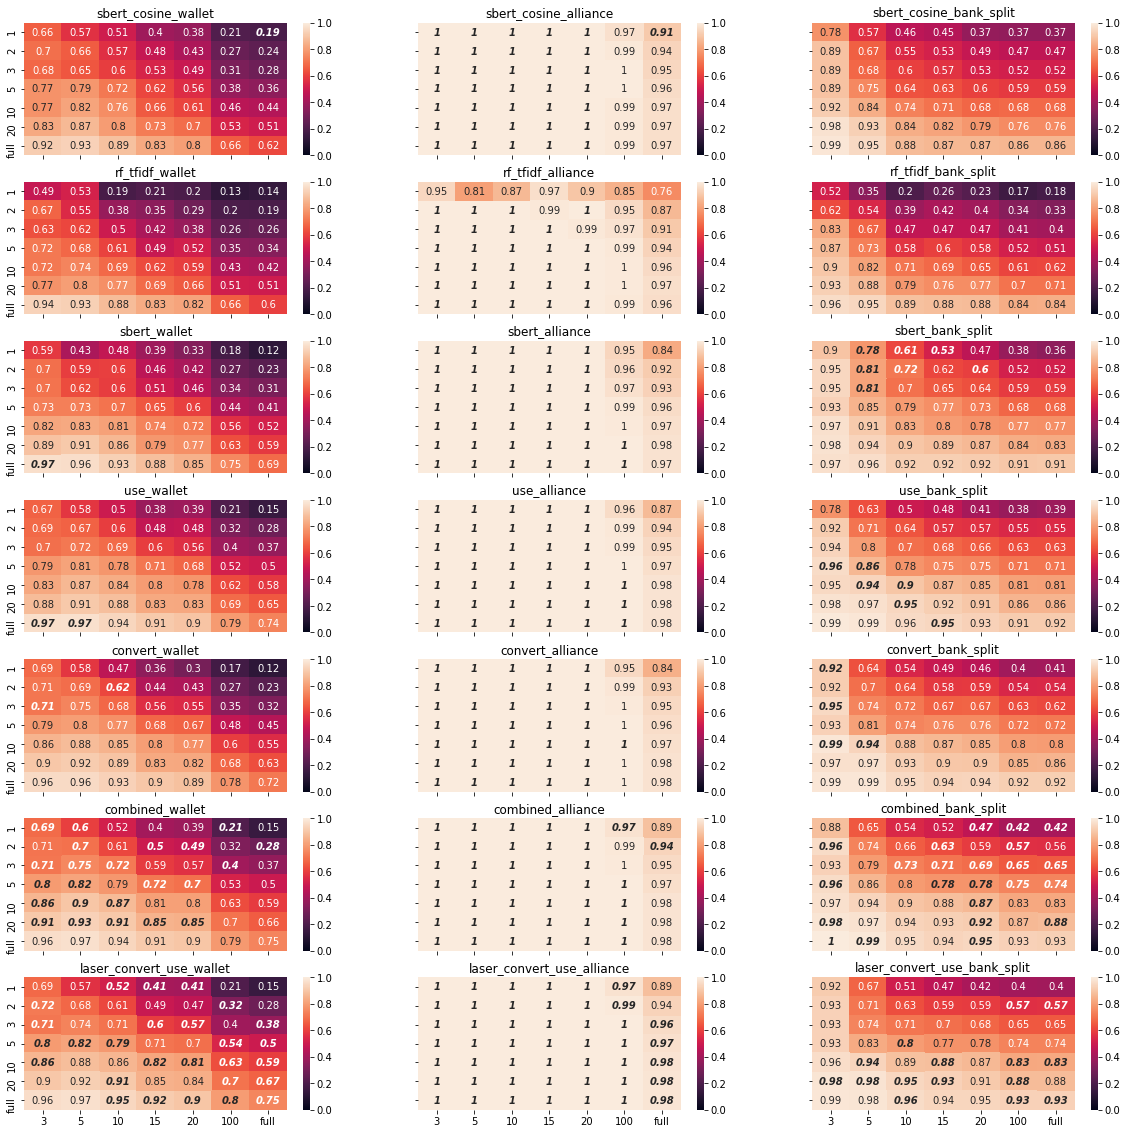

In [47]:
# darray = []
fig, ax = plt.subplots(nrows = len(algos), ncols = len(datasets), figsize=(20,20), sharex=True, sharey=True)
for ca, algo in enumerate(algos):
    print(ca)
    for cd, over_ride_dataset in enumerate(datasets):
        r = pd.read_csv(f'../200930_{algo}_{over_ride_dataset}.csv')
        st=os.stat(f'../200930_{algo}_{over_ride_dataset}.csv') 
        mtime=st.st_mtime
        print(mtime)
        print("mdatetime = {}".format(datetime.datetime.fromtimestamp(mtime)))
        try:
#             display(r)
            data = r[['3','5','10','15','20','100','full']]
            data.index = [1,2,3,5,10,20, 'full']
            
#             print(darray[ca::3])
            ax[ca, cd]=sns.heatmap(data,annot=True,
                                              # Use annot key with np.array as value containing strings of data + latex 
            # prefixes/suffices making the bold/italic/underline formatting
#             annot=np.array([r'\\textbf{\emph{\underline{' + str(d) + '}}}'
#                             for d in data.values.ravel()]).reshape(
#                 np.shape(data.values)),
            # fmt key must be empty, formatting error otherwise
#             fmt='',
                                   vmin=0, vmax=1, ax = ax[ca, cd], mask = data.values != np.max(darray[cd::3], axis=0), annot_kws={"style": "italic", "weight": "bold"}, )#, xlabel='nclasses')
            ax[ca, cd]=sns.heatmap(data, annot=True,vmin=0, vmax=1, ax = ax[ca, cd], mask = data.values == np.max(darray[cd::3], axis=0), cbar=False)#, xlabel='nclasses')
            ax[ca, cd].set_title(f'{algo}_{over_ride_dataset}')
#             darray.append(data)
        except Exception as e:
            print(e)
#             plt.xlabel('nclasses'); plt.ylabel('samples/class')
#             plt.show()
plt.savefig('201002_matrix_results.png')
plt.show()

In [48]:
data

,3,5,10,15,20,100,full
1,0.915152,0.672794,0.514124,0.468630,0.419765,0.404199,0.398867
2,0.933333,0.713235,0.632768,0.594110,0.592955,0.565811,0.569810
3,0.933333,0.742647,0.713748,0.697823,0.678082,0.650783,0.650783
5,0.933333,0.834559,0.798493,0.774648,0.776908,0.742086,0.740753
10,0.963636,0.941176,0.888889,0.884763,0.868885,0.826391,0.831390
20,0.981818,0.977941,0.945386,0.930858,0.913894,0.877374,0.877374
full,0.987879,0.981618,0.958569,0.942382,0.945205,0.932356,0.931356


In [56]:
d1 = [i.flatten().mean() for i in darray[0::3]]
d2 = [i.flatten().mean() for i in darray[1::3]]
d3 = [i.flatten().mean() for i in darray[2::3]]

Text(0.5, 1.0, 'wallet')

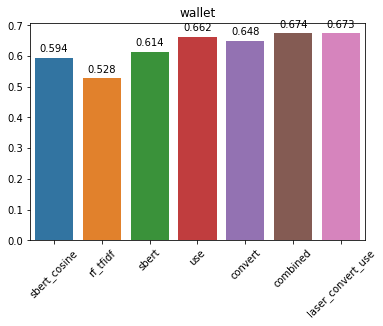

In [57]:
splot = sns.barplot(x = algos, y=d1, )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.title('wallet')

Text(0.5, 1.0, 'alliance')

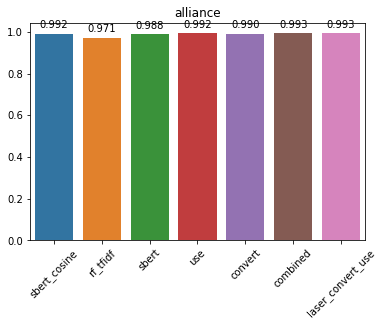

In [58]:
# algos=['sbert','use','convert','combined','laser_convert_use']
splot = sns.barplot(x = algos, y=d2, )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.title('alliance')

Text(0.5, 1.0, 'bank')

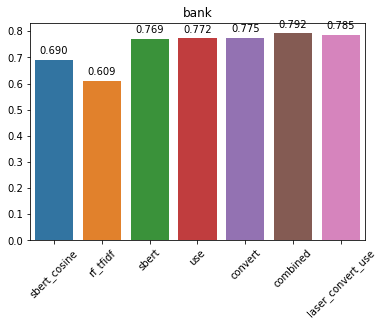

In [59]:
# algos=['sbert','use','convert','combined','laser_convert_use']
splot = sns.barplot(x = algos, y=d3, )
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.3f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

plt.xticks(rotation=45)
plt.title('bank')

In [91]:
darray.mean(axis = 1)

array([[0.84725029, 0.74198718, 0.67948045, 0.62847413, 0.60375189,
        0.51806548, 0.46596553],
       [0.87991022, 0.80094269, 0.75536945, 0.69133883, 0.68198585,
        0.61093204, 0.58017955],
       [0.88242424, 0.83135369, 0.79666799, 0.751058  , 0.73648197,
        0.66679324, 0.64311856],
       [0.9081706 , 0.8800905 , 0.84963756, 0.81963998, 0.80898889,
        0.73859118, 0.71814053],
       [0.93813693, 0.93523757, 0.90932179, 0.8849224 , 0.87383689,
        0.80450097, 0.78368309],
       [0.95800225, 0.96124622, 0.94085756, 0.91457762, 0.90782213,
        0.84677745, 0.82615514],
       [0.98361392, 0.98224924, 0.96277455, 0.9479364 , 0.94099346,
        0.90139805, 0.87571922]])

In [89]:
darray[2::3].shape

(5, 7, 7)

In [83]:
np.max(darray[2::3], axis=0)

array([[0.92121214, 0.7830882 , 0.61393595, 0.5262484 , 0.47260273,
        0.41786072, 0.41552815],
       [0.95757574, 0.8125    , 0.7175141 , 0.62740076, 0.5998043 ,
        0.5658114 , 0.5698101 ],
       [0.95151514, 0.8125    , 0.7306968 , 0.7106274 , 0.69373775,
        0.65211594, 0.6534489 ],
       [0.95757574, 0.8639706 , 0.7984934 , 0.77976954, 0.77984345,
        0.7454182 , 0.74275243],
       [0.9878788 , 0.9411765 , 0.90207154, 0.8847631 , 0.86986303,
        0.8263912 , 0.83138955],
       [0.9818182 , 0.97794116, 0.94538605, 0.9308579 , 0.9187867 ,
        0.87737423, 0.8780407 ],
       [1.        , 0.9889706 , 0.95856875, 0.9475032 , 0.94716245,
        0.9323559 , 0.9313562 ]])

In [84]:
darray[2::3]

array([[[0.8969697 , 0.7830882 , 0.61393595, 0.5262484 , 0.4667319 ,
         0.37620792, 0.3578807 ],
        [0.94545454, 0.8125    , 0.7175141 , 0.6158771 , 0.5998043 ,
         0.521826  , 0.51616126],
        [0.94545454, 0.8125    , 0.700565  , 0.65428936, 0.63600785,
         0.59346884, 0.5914695 ],
        [0.93333334, 0.85294116, 0.7947269 , 0.765685  , 0.7270059 ,
         0.6764412 , 0.67710763],
        [0.969697  , 0.9117647 , 0.83427495, 0.8002561 , 0.7808219 ,
         0.7707431 , 0.7684105 ],
        [0.9757576 , 0.9411765 , 0.9001883 , 0.88604355, 0.8679061 ,
         0.83772075, 0.83472174],
        [0.969697  , 0.9632353 , 0.92467046, 0.9231754 , 0.9158513 ,
         0.9053649 , 0.90969676]],

       [[0.77575755, 0.63235295, 0.49905837, 0.475032  , 0.41389433,
         0.38120627, 0.38687104],
        [0.91515154, 0.70955884, 0.64218456, 0.57490396, 0.56751466,
         0.5451516 , 0.5494835 ],
        [0.93939394, 0.8014706 , 0.6967985 , 0.67733675, 0.65753424,
  

In [27]:
r=pd.read_csv('../200930_use_bank_split.csv')

In [37]:
r.

,Unnamed: 0,3,5,10,15,20,100,full
0,1,0.775758,0.632353,0.499058,0.475032,0.413894,0.381206,0.386871
1,2,0.915152,0.709559,0.642185,0.574904,0.567515,0.545152,0.549484
2,3,0.939394,0.801471,0.696798,0.677337,0.657534,0.631789,0.629457
3,5,0.957576,0.863971,0.777778,0.752881,0.745597,0.712096,0.713762
4,10,0.951515,0.941176,0.902072,0.865557,0.852250,0.809730,0.807398
5,20,0.975758,0.970588,0.945386,0.923175,0.906067,0.858381,0.855715
6,full,0.993939,0.985294,0.956685,0.947503,0.933464,0.914695,0.915361


Text(33.0, 0.5, 'samples/class')

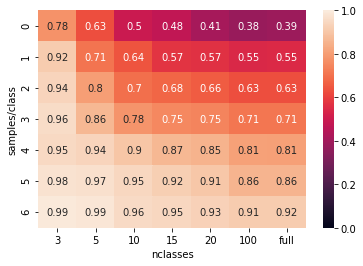

In [48]:
data = r[['3','5','10','15','20','100','full']]
sns.heatmap(data, annot=True,vmin=0, vmax=1 )#, xlabel='nclasses')
plt.xlabel('nclasses'); plt.ylabel('samples/class')

In [14]:
def online_learning_sim_class_sample(train, nsamples=1):
  
    if nsamples=='full':
        return train
    else:
        nsamples=int(nsamples)
        
    newdf=pd.DataFrame(columns=['text','labels'])
    for c in train.labels.unique():
        temp=train.loc[train.labels==c][:nsamples]
        newdf = newdf.append(temp)
    #     break
    return newdf.reset_index(drop=True)

In [15]:
train = online_learning_sim_class_sample(train,1)

In [18]:
most_freq_classes = train.labels.value_counts().index[:3]
train = train.loc[train.labels.isin(most_freq_classes)]
test = test.loc[test.labels.isin(most_freq_classes)]
le=LabelEncoder()
train['labels'] = le.fit_transform(train.labels)
test['labels'] = le.transform(test.labels)

In [26]:
def sbert_cosine(train, test):    
    from sentence_transformers import SentenceTransformer
    import time
    import scipy

    # sbert_model = 'roberta-large-nli-stsb-mean-tokens' #'distilbert-base-nli-mean-tokens'
    sbert_model = 'distiluse-base-multilingual-cased'

    model = SentenceTransformer(sbert_model)

#     train_ques_embd = [model.encode(t)[0] for t in train.text]

    print("SBERT + COSINE Model")
    test_ques=test.text
    # res1 = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024
    start_time = time.time()
    # train_ques_embd = [model.encode(t)[0] for t in train.text]
    train_ques_embd=model.encode(train.text)
    end_time = time.time()
    test_ques = model.encode(test.text)

    train_intn=train.labels
    test_intn=test.labels

    # res2 = resource.getrusage(resource.RUSAGE_SELF).ru_maxrss / 1024

    # print("Train Time = " + str(end_time-start_time) + " sec.")
    # print("Memory Usage = " + str(res2-res1+res) + " MB")

    top = 5
    count = 0
    count1 = 0
    time_count = []
    for c, i in enumerate(test_ques):
        #     start_time = time.time()
        #     test_q = test_ques[i]
        #     test_q_emb = model.encode(test_q)
            dist_vec = scipy.spatial.distance.cdist([i], train_ques_embd, 'cosine')[0]
            pred_intn = train_intn[np.argmin(dist_vec)]
#             pred_top_indx = np.argpartition(dist_vec, top)[:top]
#             pred_top_intn = [train_intn[indx] for indx in pred_top_indx]
        #     end_time = time.time()
        #     time_count.append(end_time-start_time)
            #
            if test_intn[c] == pred_intn:
                count = count + 1
#             if test_intn[c] in pred_top_intn:
#                 count1 = count1 + 1


#     avg_inf_time = sum(time_count) / len(test_ques) * 1000
    p1 = count / len(test_ques)
    print("P@1 = " + str(count / len(test_ques)))
#     print("P@5 = " + str(count1 / len(test_ques)))
#     print("Inference Time = " + str(avg_inf_time) + " msec.")
    return p1

In [27]:
train.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

In [28]:
sbert_cosine(train, test)

I1002 21:52:54.743911 140628053641024 SentenceTransformer.py:39] Load pretrained SentenceTransformer: distiluse-base-multilingual-cased
I1002 21:52:54.747434 140628053641024 SentenceTransformer.py:43] Did not find folder distiluse-base-multilingual-cased. Assume to download model from server.
I1002 21:52:54.750523 140628053641024 SentenceTransformer.py:93] Load SentenceTransformer from folder: /root/.cache/torch/sentence_transformers/sbert.net_models_distiluse-base-multilingual-cased
I1002 21:52:56.510464 140628053641024 SentenceTransformer.py:117] Use pytorch device: cuda


SBERT + COSINE Model



P@1 = 0.9565217391304348


0.9565217391304348